In [241]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import plotly as plt
from matplotlib.lines import *
from matplotlib.patches import *
from matplotlib.text import *
from matplotlib.image import *
import seaborn as sns
import squarify
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objs as go 
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [242]:
#Dirty Dataset - Part 1

In [243]:
df = pd.read_csv("Data_Analyst_Sample.csv")

In [244]:
# Display the first 5 rows of the dataframe
print(df.head())

                                       Campaign Name  Campaign ID  \
0  CY21_Q1_LOC_BE_Mercedes_S-Class_ProgrammaticDi...     25347887   
1  CY21_Q1_LOC_BE_Mercedes_S-Class_ProgrammaticDi...     25347887   
2  CY21_Q1_LOC_BE_Mercedes_S-Class_ProgrammaticDi...     25347887   
3  CY21_Q1_LOC_BE_Mercedes_S-Class_ProgrammaticDi...     25347887   
4  CY21_Q1_LOC_BE_Mercedes_S-Class_ProgrammaticDi...     25347887   

                                           Placement        Date  Impressions  \
0  BE_Mercedes_S-Class_DV360_DkTbMb_Contextual_16...  05/03/2021         39.0   
1  BE_Mercedes_S-Class_DV360_DkTbMb_Contextual_16...  06/03/2021         43.0   
2  BE_Mercedes_S-Class_DV360_DkTbMb_Contextual_16...  07/03/2021         35.0   
3  BE_Mercedes_S-Class_DV360_DkTbMb_Contextual_16...  08/03/2021         60.0   
4  BE_Mercedes_S-Class_DV360_DkTbMb_Contextual_16...  09/03/2021         17.0   

   Clicks  Cost  Video Completions  Find A Dealer Conversion  \
0       0  0.17                  0

In [245]:
# Display the last 5 rows of the dataframe
print(df.tail())

                                           Campaign Name  Campaign ID  \
52476  CY21_Q1_LOC_ES_Smart_Fortwo_ProgrammaticDispla...     25362071   
52477  CY21_Q1_LOC_ES_Smart_Fortwo_ProgrammaticDispla...     25362071   
52478  CY21_Q1_LOC_ES_Smart_Fortwo_ProgrammaticDispla...     25362071   
52479  CY21_Q1_LOC_ES_Smart_Fortwo_ProgrammaticDis_Pr...     25362071   
52480  CY21_Q1_LOC_ES_Smart_Fortwo_ProgrammaticVideo_...     24922332   

                                        Placement        Date  Impressions  \
52476  ES_Smart_Fortwo_TTD_TbMb_Contextual_728x90  28/03/2021          0.0   
52477  ES_Smart_Fortwo_TTD_TbMb_Contextual_728x90  29/03/2021          0.0   
52478  ES_Smart_Fortwo_TTD_TbMb_Contextual_728x90  30/03/2021          0.0   
52479  ES_Smart_Fortwo_TTD_TbMb_Contextual_728x90  31/03/2021          0.0   
52480     ES_Smart_Fortwo_TTD_DkTbMb_Interest_30"  11/01/2021          1.0   

       Clicks  Cost  Video Completions  Find A Dealer Conversion  \
52476     347  0.00     

In [246]:
# Display some basic statistical information about the dataframe
print(df.describe())

        Campaign ID   Impressions        Clicks          Cost  \
count  5.248100e+04  5.245100e+04  52481.000000  52458.000000   
mean   2.537639e+07  4.841354e+03     29.774356     28.538750   
std    4.054270e+04  2.562214e+04    176.324974    167.347141   
min    2.492233e+07  0.000000e+00      0.000000      0.000000   
25%    2.533641e+07  6.100000e+01      0.000000      0.270000   
50%    2.536894e+07  4.120000e+02      1.000000      1.970000   
75%    2.541376e+07  2.258000e+03      4.000000     11.530000   
max    2.553608e+07  2.537059e+06   7662.000000  11826.480000   

       Video Completions  Find A Dealer Conversion  Online Brochure Download  
count       52481.000000              52481.000000              52481.000000  
mean          995.629104                  3.051790                  1.231589  
std          5552.026890                 21.285292                  8.802559  
min             0.000000                  0.000000                  0.000000  
25%             0.0

In [247]:
df.shape

(52481, 10)

In [248]:
missing_values = df.isnull().sum()
print(missing_values)

Campaign Name               36
Campaign ID                  0
Placement                    0
Date                        33
Impressions                 30
Clicks                       0
Cost                        23
Video Completions            0
Find A Dealer Conversion     0
Online Brochure Download     0
dtype: int64


In [249]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Campaign Name    36
Date             33
Impressions      30
Cost             23
dtype: int64


In [250]:
df = df.dropna(subset=df.select_dtypes(include=['object']).columns, how='any')

In [251]:
df.update(df[df.select_dtypes(include=['int', 'float']).columns].fillna(0))

In [252]:
for col in df.select_dtypes(include=['int', 'float']).columns:
    df[col].fillna(0, inplace=True)

In [253]:
missing_values = df.isnull().sum()
print(missing_values)

Campaign Name               0
Campaign ID                 0
Placement                   0
Date                        0
Impressions                 0
Clicks                      0
Cost                        0
Video Completions           0
Find A Dealer Conversion    0
Online Brochure Download    0
dtype: int64


In [254]:
df.notnull().all()

Campaign Name               True
Campaign ID                 True
Placement                   True
Date                        True
Impressions                 True
Clicks                      True
Cost                        True
Video Completions           True
Find A Dealer Conversion    True
Online Brochure Download    True
dtype: bool

In [255]:
#Dirty Dataset - part 2

In [256]:

# read the errors.csv file into a dataframe
errors_df = pd.read_csv("errors.csv")

In [257]:
# read the Data_Analyst_Sample.csv file into a dataframe
data_df = pd.read_csv("Data_Analyst_Sample.csv")

In [258]:
# count the number of errors in the dataset
error_count = 0
data_df["Campaign Name"] = data_df["Campaign Name"].astype(str)
for i, row in errors_df.iterrows():
    if data_df["Campaign Name"].str.contains(row["Campaign error name"]).any():
        error_count += 1
        # use the .replace() method to correct the errors
        data_df["Campaign Name"].replace(row["Campaign error name"], row["Campaign correct"], inplace=True)

print("Number of errors found:", error_count)

Number of errors found: 4


In [259]:
# verify the errors have been corrected
print("Errors corrected:", error_count)

Errors corrected: 4


In [260]:
# export the corrected "Campaign Name" column to a .csv file
data_df[["Campaign Name"]].to_csv("corrected_campaign_names.csv", index=False)

In [261]:
#Core Learning 3 - Exploratory Data Analysis (EDA)

In [262]:
# Reading the csv file and storing it in a variable named 'data'
data = pd.read_csv('./Superstore_data_sample.csv')

In [263]:
# Exploration methods

In [264]:
# Using the head() method to display the first 5 rows of the data
print(data.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   8/11/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   8/11/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   12/6/2016  16/06/2016    Second Class    DV-13045   
3       4  US-2015-108966  11/10/2015  18/10/2015  Standard Class    SO-20335   
4       5  US-2015-108966  11/10/2015  18/10/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [265]:
# Using the describe() method to display the statistical summary of the numerical columns
print(data.describe())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9989.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.955257     3.789574     0.156203   
std    2885.163629  32063.693350    623.385594     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.500000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.970000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


In [266]:
# Using the info() method to display the information of the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9981 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9982 non-null   object 
 17  Sales          9989 non-null   float64
 18  Quantity

In [267]:
# check the shape of the data (rows, columns)
print(data.shape)

(9994, 21)


In [268]:
# check the columns with missing values
print(data.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name    13
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name     12
Sales             5
Quantity          0
Discount          0
Profit            0
dtype: int64


In [278]:
# Data Cleaning

In [279]:
# Remove missing values from columns with object datatype
df = data.dropna(subset=data.select_dtypes(include=['object']).columns, how='any')

In [280]:
# Replace missing values with zero in columns with numeric datatype
df = df.fillna(0)

In [281]:
# verify that there are no missing values
print(df.isnull().sum().sum()) # prints the total number of missing values in the dataframe

0


In [282]:
#Core Learning 3 - Exploratory Data Analysis (EDA) - continued

In [274]:
"""
Question 1:
Which category (furniture, office supplies and technology) has the most products? 
and of each subcategory, how many products are there?
"""

'\nQuestion:\nWhich category (furniture, office supplies and technology) has the most products? \nand of each subcategory, how many products are there?\n'

In [283]:
# Reading the csv file and storing it in a variable named 'data'
first_q = pd.read_csv('./Superstore_data_sample.csv')

In [284]:
# group the 'Product Name' column by 'Category' and 'Sub-Category'
grouped_csc = first_q.groupby(['Category', 'Sub-Category'])['Product Name'].count()

# print the result
print(grouped_csc)

Category         Sub-Category
Furniture        Bookcases        227
                 Chairs           617
                 Furnishings      956
                 Tables           319
Office Supplies  Appliances       466
                 Art              796
                 Binders         1523
                 Envelopes        254
                 Fasteners        216
                 Labels           364
                 Paper           1367
                 Storage          845
                 Supplies         190
Technology       Accessories      774
                 Copiers           68
                 Machines         114
                 Phones           886
Name: Product Name, dtype: int64


In [285]:
# group the 'Product Name' column by 'Category' against and find the total number of products per category
grouped_c = first_q.groupby(['Category'])['Product Name'].size()

# print the result
print(grouped_c)

Category
Furniture          2121
Office Supplies    6026
Technology         1847
Name: Product Name, dtype: int64


In [286]:
# group the 'Product Name' column by 'Sub-Category' and find the total number of products per subcategory
grouped_sc = first_q.groupby(['Sub-Category'])['Product Name'].count()

# print the result
print(grouped_sc)

Sub-Category
Accessories     774
Appliances      466
Art             796
Binders        1523
Bookcases       227
Chairs          617
Copiers          68
Envelopes       254
Fasteners       216
Furnishings     956
Labels          364
Machines        114
Paper          1367
Phones          886
Storage         845
Supplies        190
Tables          319
Name: Product Name, dtype: int64


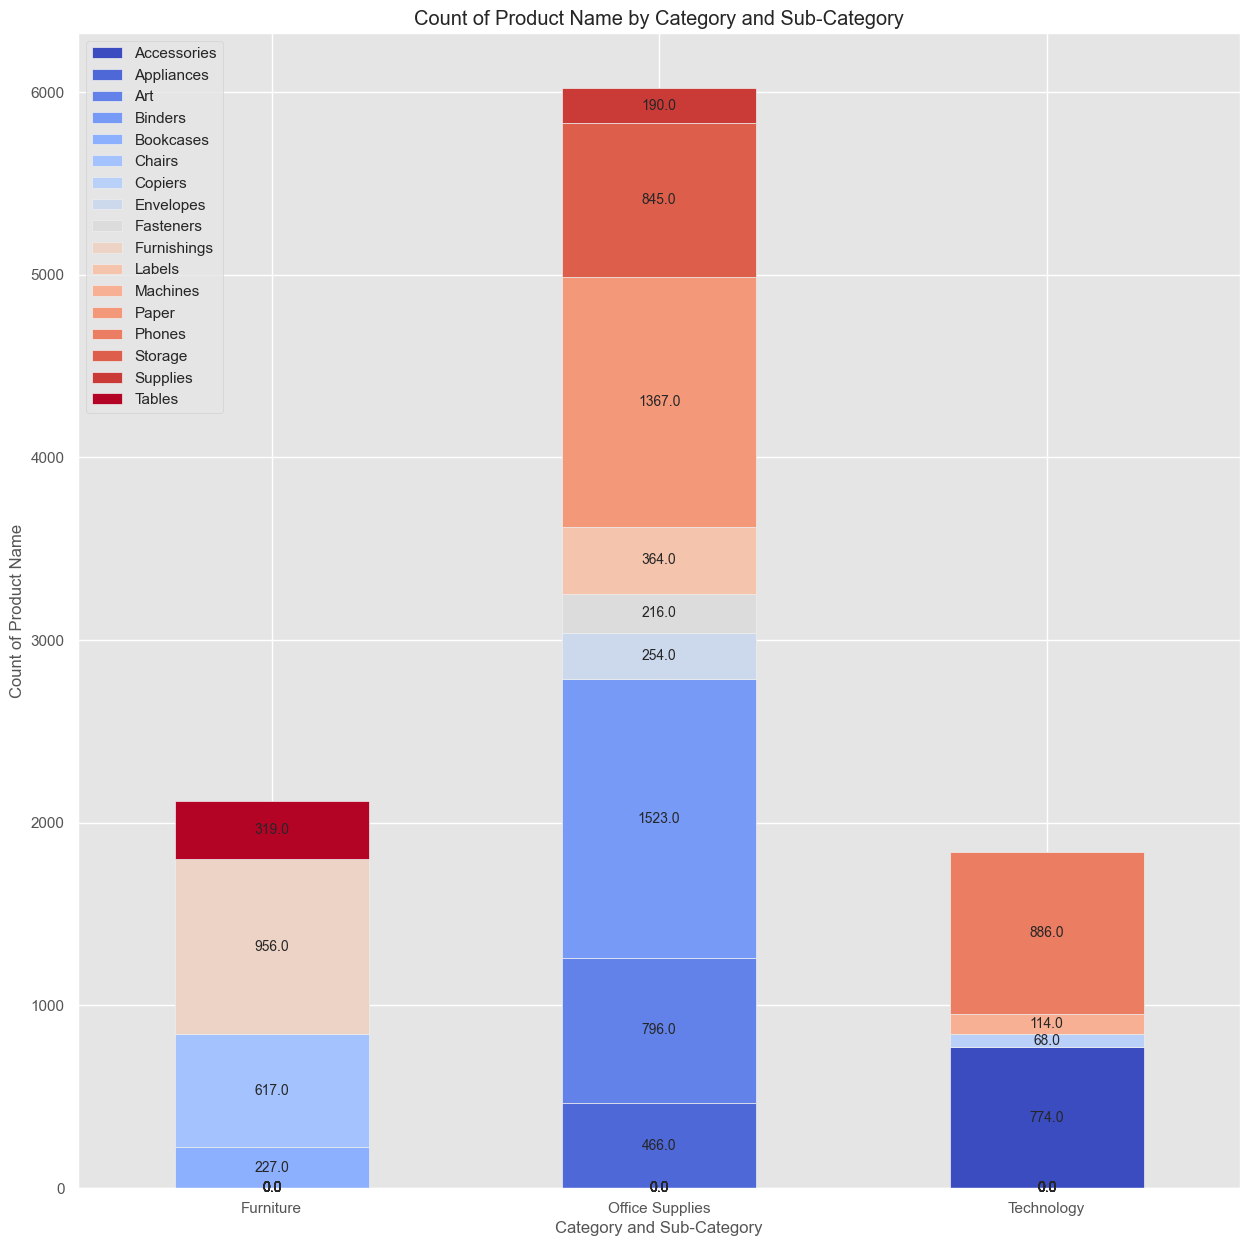

In [287]:
# Create a stacked bar chart
grouped_csc.unstack().plot(kind='bar', stacked=True, figsize=(15, 15), colormap='coolwarm')

# Find the axis of the graph
ax = plt.gca()

#selects the position of the bar on the x axis
for i in ax.containers:
    #for each stack on the x axis
    for j in i:
        #get the x and y center position of each stack and plot the values in that position
        ax.text(j.get_x() + j.get_width()/2., j.get_y() + j.get_height()/2., str(j.get_height()), 
                ha='center', va='center', rotation=0)

# Rotate x-axis labels
plt.xticks(rotation=0)

# Add labels and title
plt.xlabel('Category and Sub-Category')
plt.ylabel('Count of Product Name')
plt.title('Count of Product Name by Category and Sub-Category')

# change location of the legend
plt.legend(loc='upper left')

# draw the stacked bar chart
plt.show()

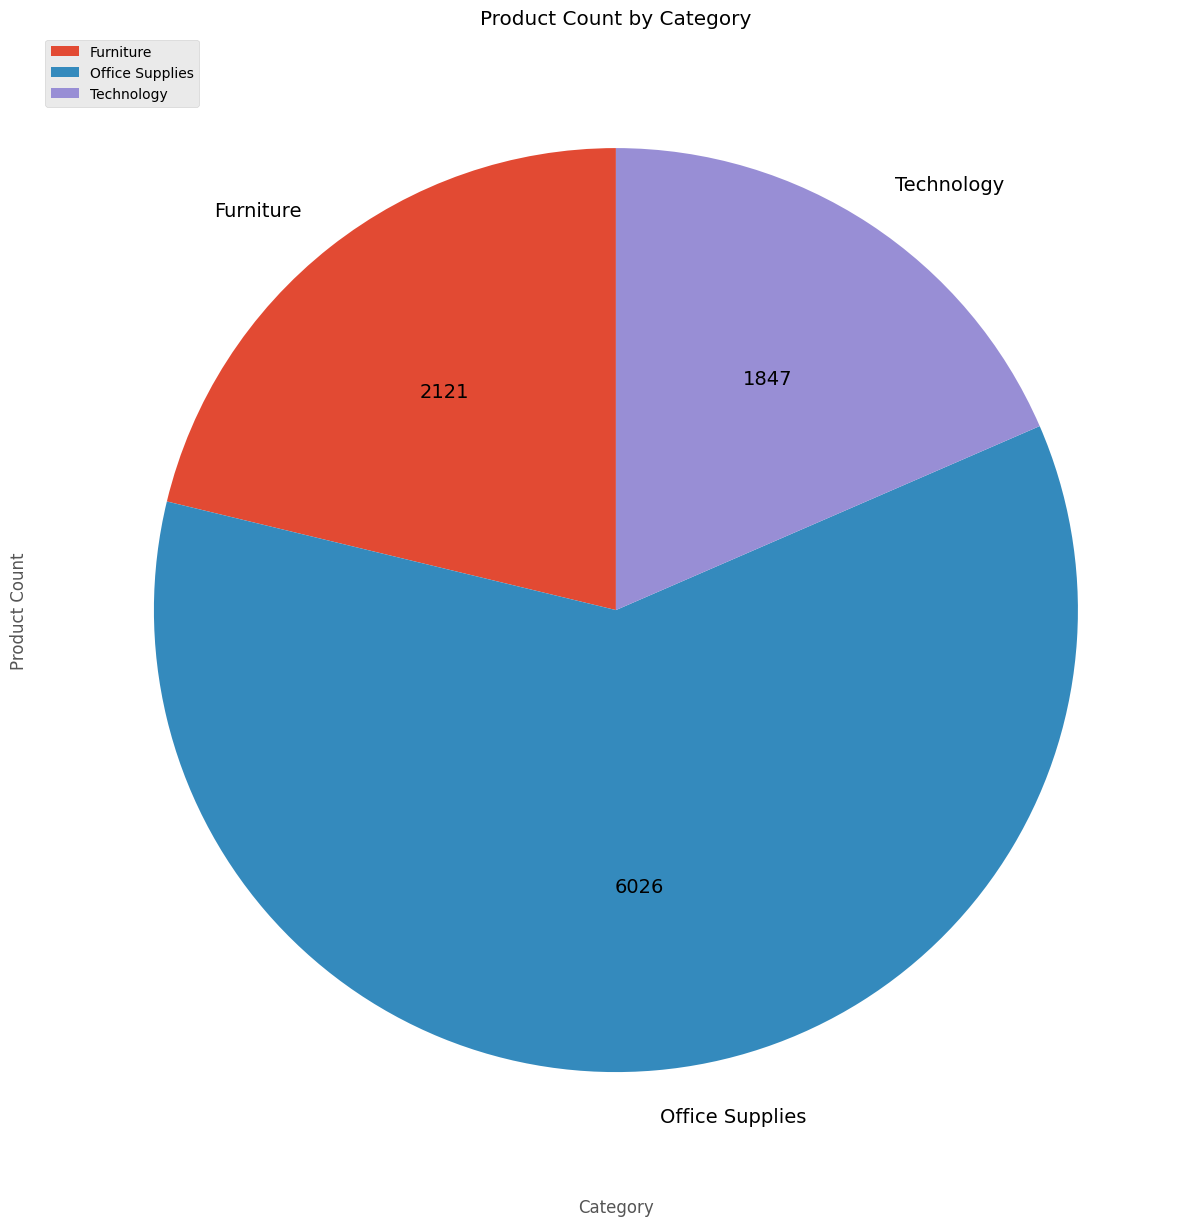

In [114]:
# create a pie chart of the product count by category
grouped_c.plot(kind='pie', labels=grouped_c.index, 
                   autopct=lambda p : '{:.0f}'.format(p * sum(grouped_c) / 100),
                   startangle=90, shadow=False, legend = False, fontsize=14, figsize=(15, 15))

# change location of the legend
plt.legend(loc='upper left')

# add a title and labels
plt.title("Product Count by Category")
plt.xlabel("Category")
plt.ylabel("Product Count")

# show the chart
plt.show()


In [ ]:
"""
Answer 1:

1. The category with the most products sold,
a. "Office Supplies" with 6026 products,
b. "Technology" with 1847 products, 
c. "Furniture" with 2121 products.

2. Within the "Office Supplies" category, 
a. the sub-category with the most products sold is "Binders" with 1523 products,
b. followed by "Paper" with 1367 products, 
c. and "Storage" with 845 products. 

3. Within the "Technology" category,
a. the sub-category with the most products is "Phones" with 886 products,
b. followed by "Accessories" with 774 products, 
c. and "Machines" with 114 products. 

4. Within the "Furniture" category, 
a. the sub-category with the most products is "Furnishings" with 956 products,
b. followed by "Chairs" with 617 products,
c. and "Bookcases" with 227 products.
""" 

In [288]:
"""
Question 2:
What is the difference in sales and profits between the different product categories (Technology, Furniture, Office Supplies)
in the Superstore_data_sample.csv dataset and which category generates the most sales and profits?
"""

'\nQuestion:\nWhat is the difference in sales and profits between the different product categories (Technology, Furniture, Office Supplies)\nin the Superstore_data_sample.csv dataset and which category generates the most sales and profits?\n'

In [290]:
# import the data file
second_q = pd.read_csv('./Superstore_data_sample.csv')

In [291]:
# check data types
print(second_q.dtypes)

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [292]:
# check for missing values
print(second_q.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name    13
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name     12
Sales             5
Quantity          0
Discount          0
Profit            0
dtype: int64


In [293]:
# drop duplicate values
second_q = second_q.drop_duplicates()

In [294]:
# check for missing values
print(second_q.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name    13
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name     12
Sales             5
Quantity          0
Discount          0
Profit            0
dtype: int64


In [295]:
# drop unnecessary columns
second_q = second_q.drop(['Row ID','Order ID','Customer ID','Product ID'], axis=1)

In [296]:
# standardize date columns
second_q['Order Date'] = pd.to_datetime(second_q['Order Date'], format='%d/%m/%Y')
second_q['Ship Date'] = pd.to_datetime(second_q['Ship Date'], format='%d/%m/%Y')

In [297]:
# remove outliers
second_q = second_q[second_q['Profit'] > 0]

In [298]:
# group data by category
category_group = second_q.groupby(by='Category').sum()

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_25604\4102288951.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_group = second_q.groupby(by='Category').sum()


In [299]:
# create a new column that contains the values of sales and profit as a tuple
second_q['Sales_Profit'] = list(zip(second_q.Sales, second_q.Profit))

In [300]:
# reshape the dataframe in long format
second_q = pd.melt(second_q, id_vars=['Category'], value_vars=['Sales', 'Profit'], var_name='sales_profit', value_name='value')

In [301]:
print(second_q)

              Category sales_profit     value
0            Furniture        Sales  261.9600
1            Furniture        Sales  731.9400
2      Office Supplies        Sales   14.6200
3      Office Supplies        Sales   22.3680
4            Furniture        Sales   48.8600
...                ...          ...       ...
16111        Furniture       Profit    4.1028
16112        Furniture       Profit   15.6332
16113       Technology       Profit   19.3932
16114  Office Supplies       Profit   13.3200
16115  Office Supplies       Profit   72.9480

[16116 rows x 3 columns]


In [302]:
grouped_second_q = second_q.groupby(["Category", "sales_profit"]).sum().reset_index()
print(grouped_second_q)

          Category sales_profit        value
0        Furniture       Profit   79387.3818
1        Furniture        Sales  465116.9615
2  Office Supplies       Profit  179106.0593
3  Office Supplies        Sales  618910.3490
4       Technology       Profit  184034.8663
5       Technology        Sales  716680.3480


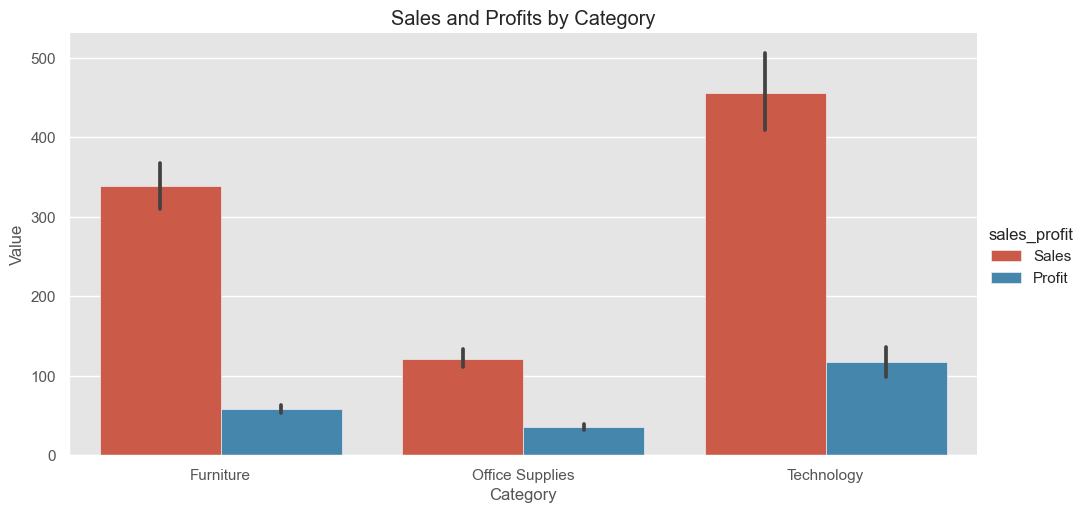

In [304]:
# create a catplot
q = sns.catplot(x='Category', y='value', hue='sales_profit', kind='bar', data=second_q, height=5, aspect=2, )

# add title and labels
plt.title("Sales and Profits by Category")
plt.xlabel("Category")
plt.ylabel("Value")

# add y values on each bar and round it to the nearest .0
for i in g.ax.containers:
    for j in i:
        g.ax.text(j.get_x() + j.get_width()/2., j.get_height()/2-10, round(j.get_height(),1), ha='center', va='bottom')

# show the plot
plt.show()

In [305]:
"""
Answer 2:
From the final table, it can be seen that: 

1. Furniture has the highest sales with 465116.9615 and the highest profit with 79387.3818. 
2. Office Supplies has the second highest sales with 618910.3490 and the second highest profit with 179106.0593. 
3. Technology has the lowest sales with 716680.3480 and the lowest profit with 184034.8663. 

To summarize, Furniture generates the most sales and profits among all categories, while Technology generates the least.
"""

'\nFrom the final table, it can be seen that: \n\n1. Furniture has the highest sales with 465116.9615 and the highest profit with 79387.3818. \n2. Office Supplies has the second highest sales with 618910.3490 and the second highest profit with 179106.0593. \n3. Technology has the lowest sales with 716680.3480 and the lowest profit with 184034.8663. \n\nTo summarize, Furniture generates the most sales and profits among all categories, while Technology generates the least.\n'

In [306]:
"""
Question 3:
Is it true that the Consumer segment in the Southern region of the United States generates the majority of the sales
for the company, as compared to other segments and regions?
"""

'\nIs it true that the Consumer segment in the Southern region of the United States generates the majority of the sales\nfor the company, as compared to other segments and regions?\n'

In [312]:
# import the csv file
third_q = pd.read_csv('./Superstore_data_sample.csv')

In [313]:
# group the data by Segment and Region columns
grouped = third_q.groupby(['Segment', 'Region'])[['Sales', 'Profit']].sum()

In [314]:
# display the grouped data
print(grouped)

                           Sales      Profit
Segment     Region                          
Consumer    Central  252031.4340   8564.0481
            East     350908.1670  41190.9843
            South    195580.9710  26913.5728
            West     362880.7730  57450.6040
Corporate   Central  157975.0128  18703.9020
            East     200409.3470  23622.5789
            South    121869.1925  15215.2232
            West     225718.2945  34437.4299
Home Office Central   91212.6440  12438.4124
            East     127460.4460  26709.2168
            South     74255.0015   4620.6343
            West     136721.7770  16530.4150


In [315]:
# reset the index to be able to plot the data
grouped.reset_index(inplace=True)

In [316]:
# display the grouped data
print(grouped)

        Segment   Region        Sales      Profit
0      Consumer  Central  252031.4340   8564.0481
1      Consumer     East  350908.1670  41190.9843
2      Consumer    South  195580.9710  26913.5728
3      Consumer     West  362880.7730  57450.6040
4     Corporate  Central  157975.0128  18703.9020
5     Corporate     East  200409.3470  23622.5789
6     Corporate    South  121869.1925  15215.2232
7     Corporate     West  225718.2945  34437.4299
8   Home Office  Central   91212.6440  12438.4124
9   Home Office     East  127460.4460  26709.2168
10  Home Office    South   74255.0015   4620.6343
11  Home Office     West  136721.7770  16530.4150


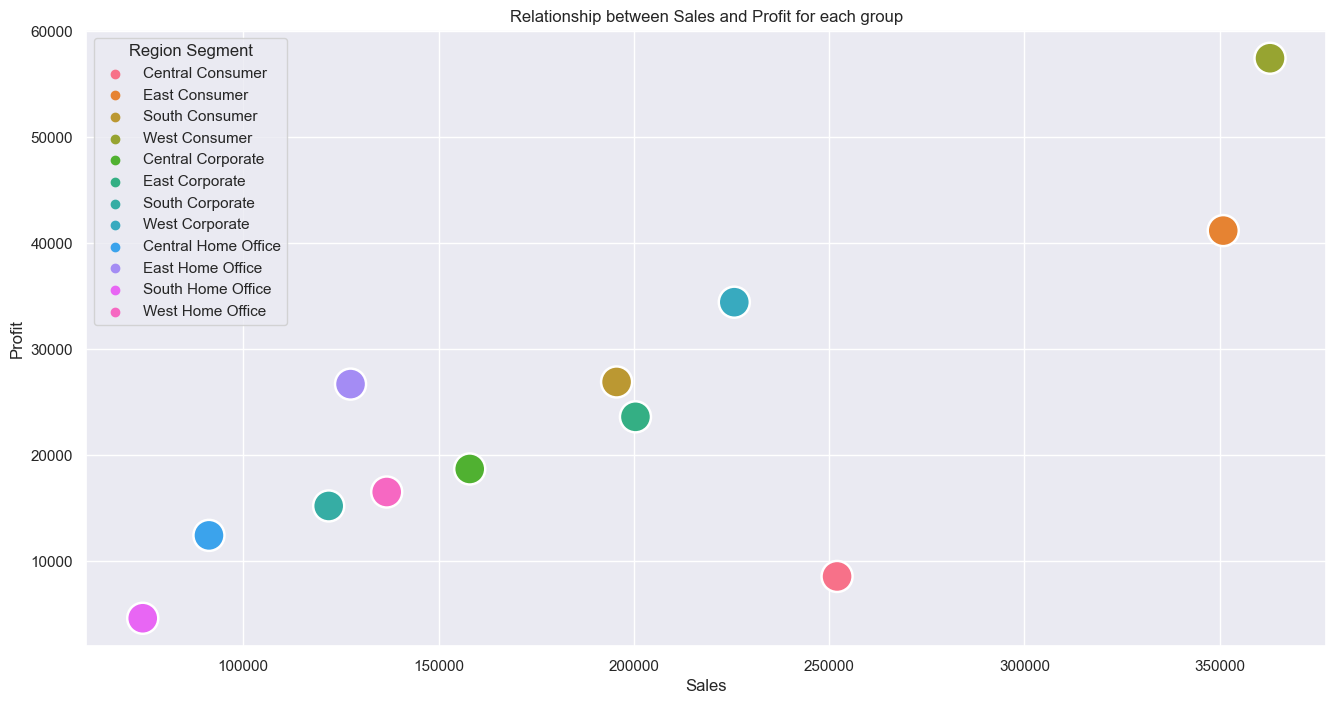

In [317]:
grouped['Region Segment'] = grouped['Region'] + ' ' + grouped['Segment']
palette = sns.color_palette("husl", n_colors=len(grouped['Region Segment'].unique()))

# create a scatter plot
sns.set(rc={'figure.figsize':(16,8)})

# Add different marker styles for each region
marker_style = ['o']

sns.scatterplot(x='Sales', y='Profit', data=grouped, hue='Region Segment', palette=palette, s=500)

# add title and labels
plt.title("Relationship between Sales and Profit for each group")
plt.xlabel("Sales")
plt.ylabel("Profit")

# modify the labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title='Region Segment')

# show plot
plt.show()

In [ ]:
"""
Answer3: 
No, based on the data provided, it can be seen that the Consumer segment in the Southern region of the United States
does not generate the majority of sales for the company. In fact, the Consumer segment in the Western region of the
United States generates the highest sales at 362880.7730. The Consumer segment in the Southern region of the United States 
generates 195580.9710 in sales which is lower than the Consumer segment in the Western region.
"""